<a href="https://colab.research.google.com/github/AnanyaKodali/MAT-494/blob/main/4_1_4_2_Graph_And_Graph_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**4.1 Graph Models and Network Analysis**

**Definition 4.1.1**

Networks are mathematical structures used to model pairwise relations between objects. A network consists of:
 * Nodes (Vertices): Represent objects or entities.
 * Edges (Links): Represent relationships or interactions between the nodes.

This abstraction allows for the analysis and visualization of complex systems in various domains.

**Definition 4.1.2**

*Examples*

1. Social Networks:
 * Nodes: Users.
 * Edges: Friendships, follows, or interactions.
2. Biological Networks:
 * Nodes: Proteins, genes, or species.
 * Edges: Interactions, regulatory relationships, or evolutionary connections.
3. Transportation Networks:
 * Nodes: Cities or intersections.
 * Edges: Roads, railways, or flight paths.

**Mathematical Intuition 4.1.3**

* Degree:
 * Definition: The number of edges connected to a node.
 * Degree Distribution: Describes the probability distribution of these degrees over the entire network.

* Directed vs. Undirected Graphs:
 * Directed Graphs: Edges have a direction, indicating a one-way relationship (e.g., Twitter follows).
 * Undirected Graphs: Edges have no direction, indicating a mutual relationship (e.g., Facebook friendships).

## Graph Models

**Definition 4.1.4**

Understanding different types of graphs is fundamental to modeling various networked systems.

1. Undirected Graphs:
 * Adjacency Matrix: Symmetric matrix where $A_{ij} = 1$ if there is an edge between nodes $i$ and $j$, else 0.
 * Use Cases: Mutual friendships, collaborations.
2. Directed Graphs:
 * Adjacency Matrix: Asymmetric matrix where $A_{ij} = 1$ if there is a directed edge from node $i$ to node $j$, else 0.
 * Use Cases: Follower relationships, citation networks.
3. Weighted Graphs:
 * Definition: Edges carry weights representing the strength or capacity of the relationship.
 * Adjacency Matrix:$A_{ij} = 1$ holds the weight of the edge between nodes $i$ and $j$.
 * Use Cases: Transportation costs, similarity measures.
4. Mixed Graphs:
 * Definition: Combination of directed, undirected, and weighted edges within the same graph.
 * Use Cases: Complex systems where relationships vary in directionality and strength.

**Mathematical Intuition 4.1.5**

*Graph Features*
1. Paths:
 * Definition: A sequence of edges connecting a sequence of nodes.
 * Shortest Path: The path with the minimum number of edges or the least total weight.
2. Cycles:
 * Definition: A closed path where the start and end nodes are the same
 * Importance: Indicators of redundancy or potential feedback loops.
3. Trees:
 * Definition: A connected graph with no cycles.
 * Characteristics: Exactly $n-1$ for $n$ nodes. Hierarchical structure.
4. Neighborhood:
 * n-hop Neighborhood: The set of nodes that can be reached from a given node within $n$ edges.
 * Use Cases: Understanding local vs. global network structures.

**Example 4.1.1: NetworkX**

Objective: Use NetworkX, Python library for the creation, manipulation, and study of complex networks, to create and visualize a sample graph.

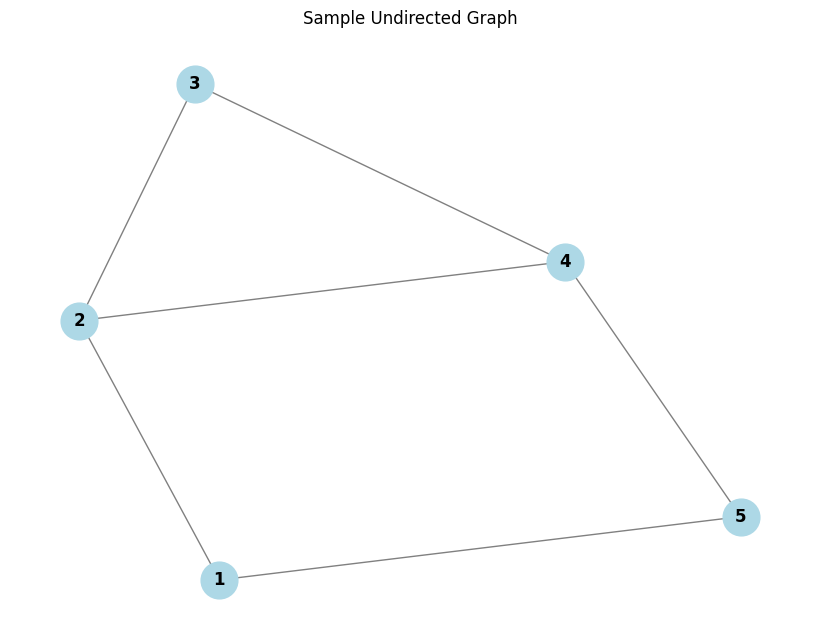

In [ ]:
# Graph Models: Creating and Visualizing a Sample Graph

import networkx as nx
import matplotlib.pyplot as plt

# Create a sample undirected graph
G = nx.Graph()
G.add_edges_from([
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),
    (1, 5),
    (2, 4)
])

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", font_weight="bold", node_size=700)
plt.title("Sample Undirected Graph")
plt.show()

## Laplacian Matrix

**Definition 4.1.6**

The Laplacian Matrix (L) of a graph is a matrix representation that captures the connectivity structure of the graph. It is defined as:
* $\mathbf{L} = \mathbf{D} - \mathbf{A}$

Where,
* $\mathbf{L}$ : is the Degree Matrix: A diagonal matrix where $D_{ii}$ is the degree of node $i$
* $\mathbf{A}$:  is the Adjacency Matrix:$A_{ij} = 1$ if there is an edge between nodes $i$ and $j$, else 0.

**Mathematical Intuition 4.1.7**

*Properties*
1. Eigenvalues: The eigenvalues of $L$ provide insights into the graph's properties.
2. Second Smallest Eigenvalue (Algebraic Connectivity): Indicates how well connected the graph is. A higher value suggests better connectivity.
3. Spectral Graph Theory: Studies the properties of graphs through the eigenvalues and eigenvectors of matrices like the Laplacian.
4. Applications:
 * Graph Partitioning: Dividing a graph into clusters.
 * Random Walks: Modeling diffusion processes on graphs.
 * Vibration Analysis: Studying mechanical properties of structures.


In [ ]:
# Laplacian Matrix: Computing and Displaying

import numpy as np
from scipy.sparse import csgraph

# Define the adjacency matrix for an undirected graph with 4 nodes
A = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

# Compute the Laplacian matrix
L = csgraph.laplacian(A, normed=False)
print("Adjacency Matrix (A):\n", A)
print("\nDegree Matrix (D):\n", np.diag(np.sum(A, axis=1)))
print("\nLaplacian Matrix (L = D - A):\n", L)

Adjacency Matrix (A):
 [[0 1 1 0]
 [1 0 1 1]
 [1 1 0 1]
 [0 1 1 0]]

Degree Matrix (D):
 [[2 0 0 0]
 [0 3 0 0]
 [0 0 3 0]
 [0 0 0 2]]

Laplacian Matrix (L = D - A):
 [[ 2 -1 -1  0]
 [-1  3 -1 -1]
 [-1 -1  3 -1]
 [ 0 -1 -1  2]]


##**4.2 Graph and Graph Modeling**

##Spectral Graph Partitioning

**Definition 4.2.1**

Spectral Graph Partitioning aims to divide a graph into two (or more) disjoint subsets such that the number of edges between these subsets is minimized. This is useful in community detection, image segmentation, and parallel computing.

**Mathematical Intuition 4.2.2**

1. Cut:
 * $\text{Cut}(V_1, V_2) = \sum_{i \in V_1, j \in V_2} A_{ij}$
 * Definition: The number of edges between partitions $V_1$ and $V_2$

2. Normalized Cut:
 * $\text{Ncut}(V_1, V_2) = \frac{\text{Cut}(V_1, V_2)}{\text{Vol}(V_1)} + \frac{\text{Cut}(V_1, V_2)}{\text{Vol}(V_2)}$
 , where $Vol(V)$ is the sum of degrees of nodes in partition $V$
 * Purpose: Balances the cut by considering the size of the partitions, avoiding unbalanced divisions


**Example 4.2.1: Spectral Clustering Implementation**

Cluster Labels: [1 1 1 0]


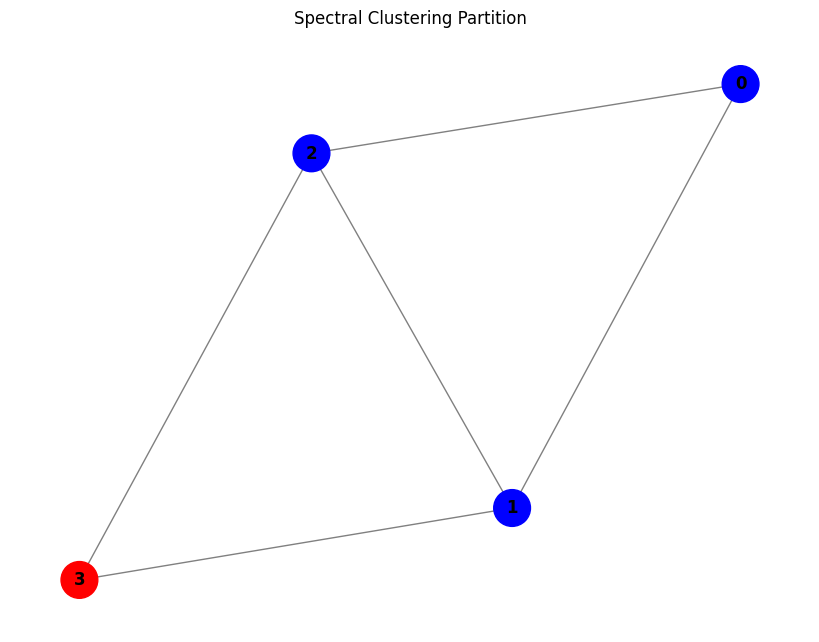

In [ ]:
# Spectral Graph Partitioning: Using Spectral Clustering

from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx  # Ensure NetworkX is imported

# Define the adjacency matrix for a simple graph
A = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
labels = spectral.fit_predict(A)

# Display the cluster labels
print("Cluster Labels:", labels)

# Visualize the partitions
G = nx.from_numpy_array(A)  # Updated function
pos = nx.spring_layout(G, seed=42)  # Positioning for visualization

# Assign colors based on cluster labels
color_map = ['red' if label == 0 else 'blue' for label in labels]

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color="gray", font_weight="bold", node_size=700)
plt.title("Spectral Clustering Partition")
plt.show()

*Code Analysis*
1. Adjacency Matrix Definition:
 * Represents the connections within the graph.
2. Spectral Clustering:
 * n_clusters=2: Partition the graph into two clusters.
 * affinity='precomputed': Indicates that the input is a precomputed adjacency matrix.
3. Cluster Labels:
 * Obtained by fitting the model to the adjacency matrix.
4. Visualization:
 * Nodes are colored based on their cluster assignments.
 * The graph layout is determined using the spring layout for better visualization

**Example 4.2.2: Eigenvalues Spectral Clustering Implementation**

Spectral Clustering leverages the eigenvalues of the Laplacian matrix to perform dimensionality reduction before clustering in a lower-dimensional space.

*Implementation*
1. Compute the Laplacian Matrix:
 * Use the degree and adjacency matrices to compute $L$.
2. Compute Eigenvalues and Eigenvectors:
 * Find the smallest $k$ eigenvalues and their corresponding eigenvectors.
3. Form the Matrix $U$:
 * Matrix of eigenvectors corresponding to the smallest $k$ eigenvalues.
4. Cluster Rows of $𝑈$:
 * Treat each row of $U$ as a point in $𝑅^𝑘$ and apply K-Means clustering.
5. Assign Cluster Labels:
 * Use K-Means results to assign cluster labels to the original nodes.

Cluster Labels: [0 0 2 2 1 1]


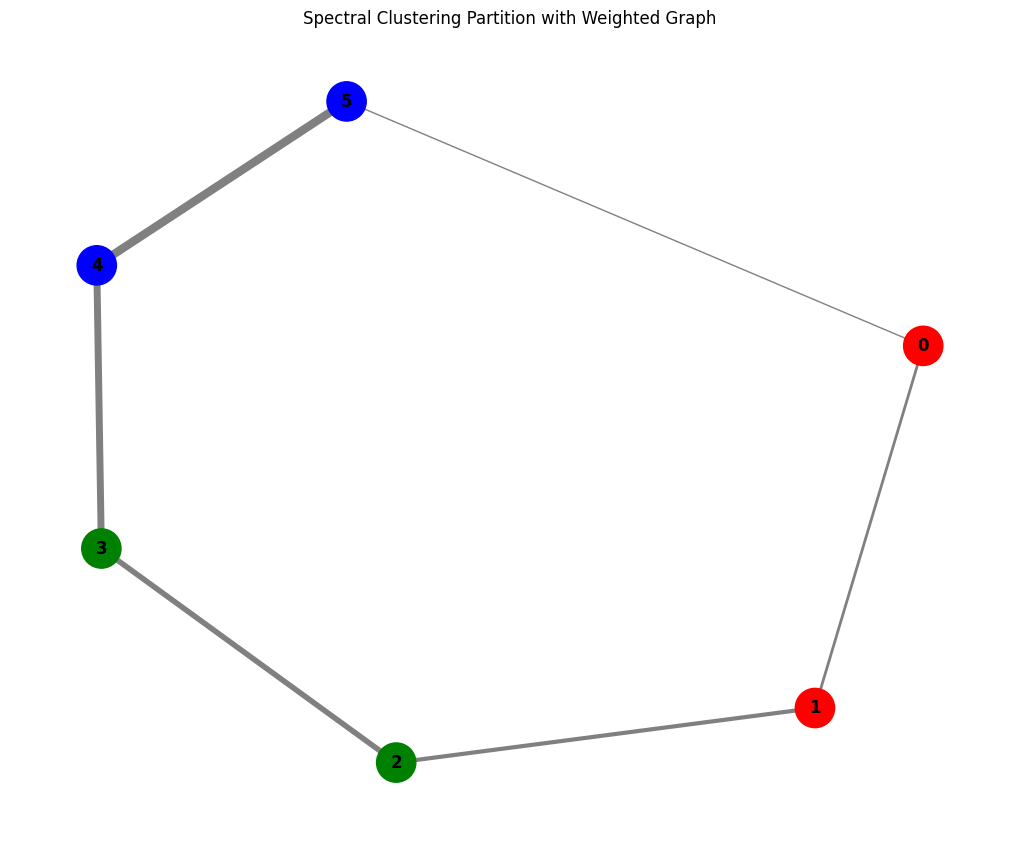

In [10]:
# Spectral Graph Partitioning: Complex Example

from sklearn.cluster import SpectralClustering
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix for a larger, weighted graph
A = np.array([
    [0, 2, 0, 0, 0, 1],
    [2, 0, 3, 0, 0, 0],
    [0, 3, 0, 4, 0, 0],
    [0, 0, 4, 0, 5, 0],
    [0, 0, 0, 5, 0, 6],
    [1, 0, 0, 0, 6, 0]
])

# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42)
labels = spectral.fit_predict(A)

# Display the cluster labels
print("Cluster Labels:", labels)

# Visualize the partitions
G = nx.from_numpy_array(A)  # Use from_numpy_array for compatibility
pos = nx.spring_layout(G, seed=42)  # Positioning for visualization

# Assign colors to nodes based on cluster labels
color_map = ['red', 'blue', 'green']
node_colors = [color_map[label] for label in labels]

# Adjust edge thickness based on weights for better visualization
edges = G.edges(data=True)
for u, v, data in edges:
    data['weight'] = A[u, v]

edge_widths = [data['weight'] for _, _, data in edges]

plt.figure(figsize=(10, 8))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color="gray",
    font_weight="bold",
    node_size=800,
    width=edge_widths,
)
plt.title("Spectral Clustering Partition with Weighted Graph")
plt.show()


**Community Detection**

Community Detection involves identifying groups of nodes within a network that are more densely connected internally than with the rest of the network. These communities often represent functional or structural modules within the network.

**Raleigh Quotient**

The Raleigh Quotient measures the quality of a graph partition by relating the Laplacian matrix and the vector representing the partition.
* $R(\mathbf{p}) = \frac{\mathbf{p}^T \mathbf{L} \mathbf{p}}{\mathbf{p}^T \mathbf{p}}$
* Purpose: Lower Raleigh Quotient values indicate better partitions with fewer inter-cluster edges


**Graph Regularization**

Graph Regularization involves adding weights or constraints to the edges to promote balanced or desirable properties in the graph partitioning.

Techniques:
1. Balanced Cuts: Ensuring that partitions are of similar sizes.
2. Normalized Cuts: Penalizing partitions with large inter-cluster edges relative to intra-cluster edges.

**Example 4.2.3: Creating and Analyzing Different Types of Graphs**

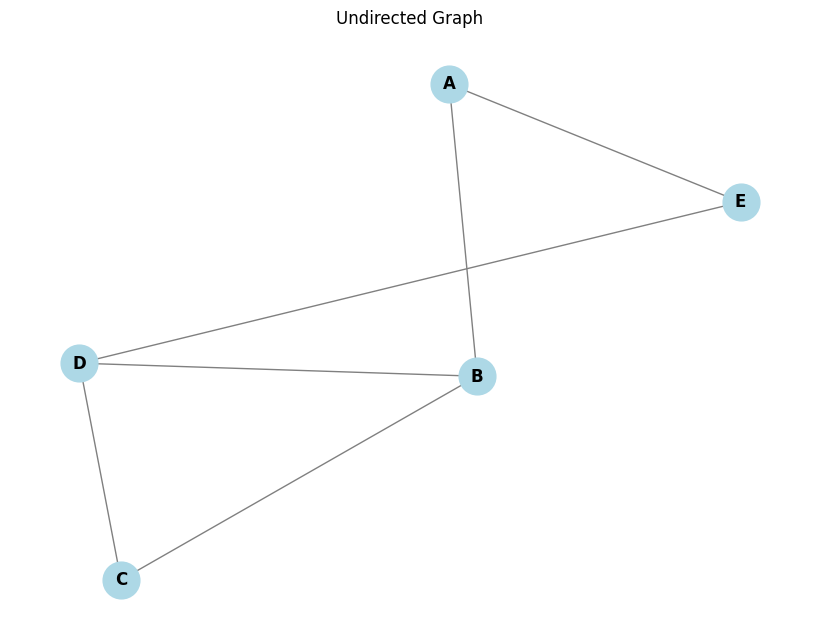

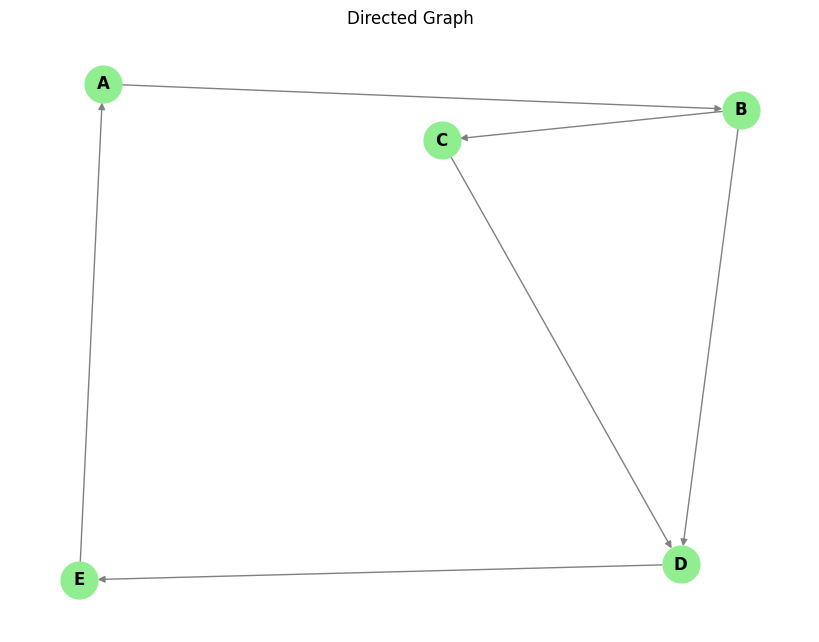

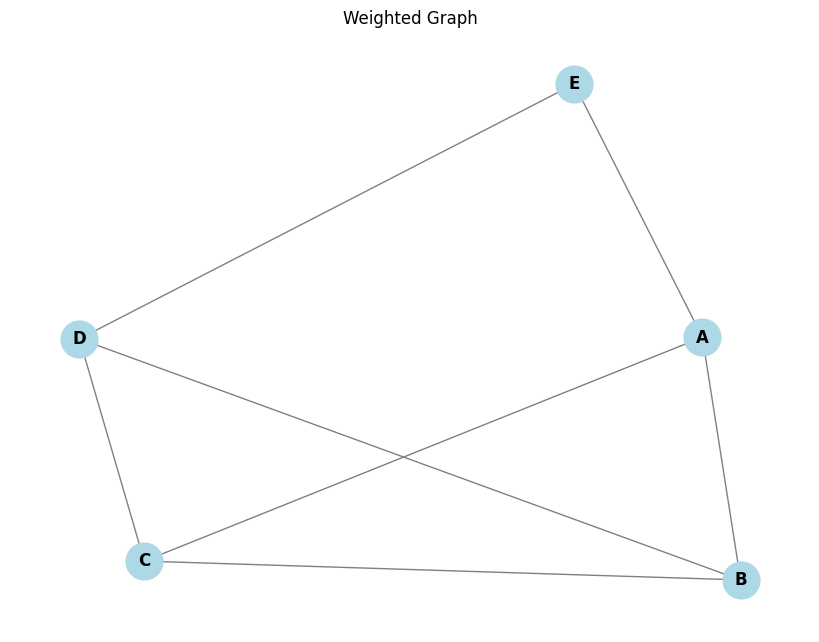

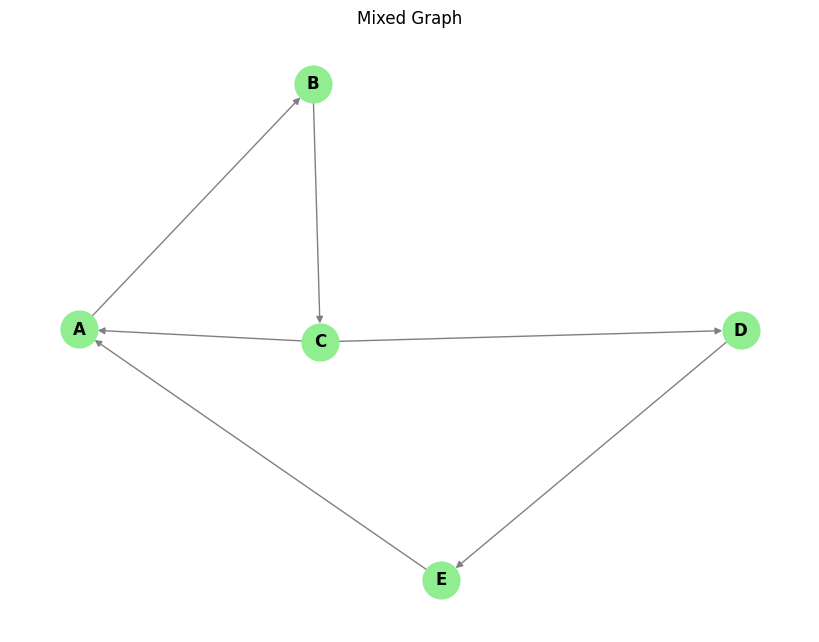

In [ ]:
# Graph Models: Creating Different Types of Graphs

import networkx as nx
import matplotlib.pyplot as plt

# 1. Undirected Graph
G_undirected = nx.Graph()
G_undirected.add_edges_from([
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'D'),
    ('D', 'E'),
    ('E', 'A'),
    ('B', 'D')
])

# 2. Directed Graph
G_directed = nx.DiGraph()
G_directed.add_edges_from([
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'D'),
    ('D', 'E'),
    ('E', 'A'),
    ('B', 'D')
])

# 3. Weighted Graph
G_weighted = nx.Graph()
G_weighted.add_weighted_edges_from([
    ('A', 'B', 4),
    ('A', 'C', 3),
    ('B', 'C', 1),
    ('B', 'D', 2),
    ('C', 'D', 4),
    ('D', 'E', 2),
    ('E', 'A', 5)
])

# 4. Mixed Graph (Undirected and Directed)
G_mixed = nx.MultiDiGraph()
G_mixed.add_edges_from([
    ('A', 'B'),
    ('B', 'C', {'weight': 2}),
    ('C', 'A', {'weight': 3}),
    ('C', 'D'),
    ('D', 'E'),
    ('E', 'A')
])

# Function to visualize graphs
def visualize_graph(G, title):
    plt.figure(figsize=(8, 6))
    if isinstance(G, nx.DiGraph):
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, with_labels=True, node_color="lightgreen", edge_color="gray",
                arrows=True, node_size=700, font_weight="bold")
    elif isinstance(G, nx.MultiDiGraph):
        pos = nx.spring_layout(G, seed=42)
        nx.draw_networkx_nodes(G, pos, node_color="lightcoral", node_size=700)
        nx.draw_networkx_labels(G, pos, font_weight="bold")
        nx.draw_networkx_edges(G, pos, edge_color="gray", arrows=True)
    else:
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
                node_size=700, font_weight="bold")
    plt.title(title)
    plt.show()

# Visualize the graphs
visualize_graph(G_undirected, "Undirected Graph")
visualize_graph(G_directed, "Directed Graph")
visualize_graph(G_weighted, "Weighted Graph")
visualize_graph(G_mixed, "Mixed Graph")

*Code Analysis*

Graph Creation:
1. Undirected Graph: Mutual relationships without direction.
2. Directed Graph: One-way relationships.
3. Weighted Graph: Edges carry weights indicating strength or capacity.
4. Mixed Graph: Combines directed edges with weights.


**Example 4.2.4: Spectral Clustering with Real-World Data**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


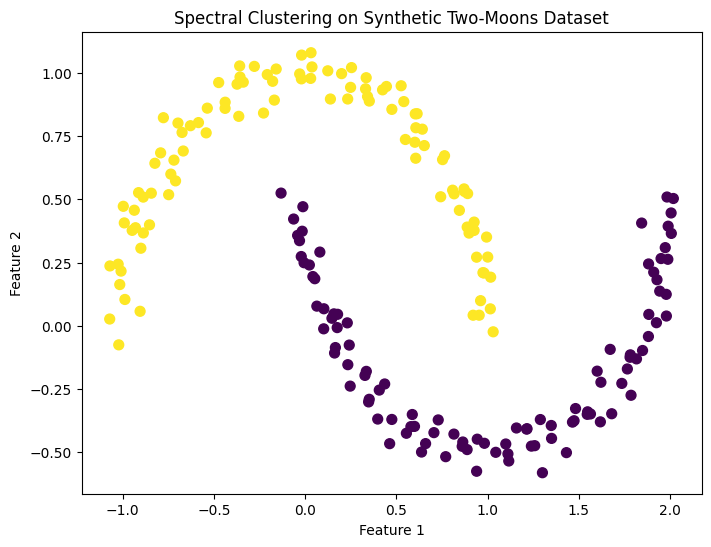

In [ ]:
# Spectral Clustering: Real-World Example with Synthetic Data

from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Generate synthetic dataset (two interleaving half circles)
X, y_true = make_moons(n_samples=200, noise=0.05, random_state=0)

# Create an adjacency matrix based on k-nearest neighbors
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=True)
A = connectivity.toarray()

# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
labels = spectral.fit_predict(A)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Spectral Clustering on Synthetic Two-Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

*Code Analysis*
1. Data Generation:
 * make_moons creates a dataset of two interleaving half circles, a common benchmark for clustering algorithms.
2. Adjacency Matrix Construction:
 * kneighbors_graph constructs a connectivity matrix using k-nearest neighbors, which serves as the adjacency matrix $𝐴$.
3. Spectral Clustering:
 * SpectralClustering is applied with affinity='precomputed' using the adjacency matrix.
4. Visualization:
 * Clusters are visualized with different colors, demonstrating the algorithm's ability to capture the non-linear structure